Analyse sales data of Super Store mart and identify opportunities to boost business growth

Introduction

Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices.

The data set contains sales, profit and geographical information of Super Store.

Our task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth.

Business Questions

* Which Category is Best Selling and Most Profitable?

* What are the Best Selling and Most Profitable Sub-Category?

* Which is the Top Selling Sub-Category?

* Which Customer Segment is Most Profitable?

* Which is the Preferred Ship Mode?

* Which Region is the Most Profitable?

* Which City has the Highest Number of Sales?

Preparing the Environment

We will import the required libraries and read in the data set.

Pandas — Data manipulation
Matplotlib and Seaborn — Data visualisation

In [1]:
#Imorting Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")
from matplotlib import pyplot

In [2]:
filepath = 'c:/datasets/Superstore 2023.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/2022 00:00:00,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Remove the columns that are not necessary for the analysis.

In [6]:
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 
'Customer Name','Product ID', 'Product Name'], axis=1)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,08/11/2022 00:00:00,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,08/11/2022 00:00:00,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,12/06/2022 00:00:00,16/06/2020,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,11/10/2021 00:00:00,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,11/10/2021 00:00:00,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
# Shape of data set
df.shape

(9994, 15)

In [8]:
# Summarised information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      9994 non-null   object 
 1   Ship Date       9994 non-null   object 
 2   Ship Mode       9994 non-null   object 
 3   Segment         9994 non-null   object 
 4   Country/Region  9994 non-null   object 
 5   City            9994 non-null   object 
 6   State           9994 non-null   object 
 7   Postal Code     9983 non-null   float64
 8   Region          9994 non-null   object 
 9   Category        9994 non-null   object 
 10  Sub-Category    9994 non-null   object 
 11  Sales           9994 non-null   float64
 12  Quantity        9994 non-null   int64  
 13  Discount        9994 non-null   float64
 14  Profit          9994 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.1+ MB


In [9]:
#To confirm data type
types = df.dtypes
print(types)

Order Date         object
Ship Date          object
Ship Mode          object
Segment            object
Country/Region     object
City               object
State              object
Postal Code       float64
Region             object
Category           object
Sub-Category       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object


In [10]:
for i in range(0, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')
    # errors='ignore' lets strings remain as 'non-null objects'

In [11]:
types = df.dtypes
print(types)

Order Date         object
Ship Date          object
Ship Mode          object
Segment            object
Country/Region     object
City               object
State              object
Postal Code       float64
Region             object
Category           object
Sub-Category       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object


Data Cleaning

Before we start with the analysis, we must first clean the data or “scrub the dirt”.

For this analysis, we will look at the more common issues such as missing and duplicate data.

In [12]:
# To deal with Missing Values
print(df.isna().sum())

Order Date         0
Ship Date          0
Ship Mode          0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


In [13]:
df.dropna(inplace = True)  # To drop(remove) the null values
df.isnull().sum() # To recheck the amount of null values, make sure it is 0

Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [15]:
#Check for duplicated values.
df.duplicated().sum() # To check the amount of duplicated values

df.drop_duplicates() # To remove the dupliacted values
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,08/11/2022 00:00:00,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,08/11/2022 00:00:00,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,12/06/2022 00:00:00,16/06/2020,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,11/10/2021 00:00:00,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,11/10/2021 00:00:00,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
df.shape

(9983, 15)

Modify the data type of certain column.

During this step, we convert Order Date from “object” to “datetime64” .

This conversion is important because it allows us to:

Extract the hour, date, day, and month

In [18]:
df["Order Date"] = df["Order Date"].astype('datetime64')
df.info() # To check the updated data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      9983 non-null   datetime64[ns]
 1   Ship Date       9983 non-null   object        
 2   Ship Mode       9983 non-null   object        
 3   Segment         9983 non-null   object        
 4   Country/Region  9983 non-null   object        
 5   City            9983 non-null   object        
 6   State           9983 non-null   object        
 7   Postal Code     9983 non-null   float64       
 8   Region          9983 non-null   object        
 9   Category        9983 non-null   object        
 10  Sub-Category    9983 non-null   object        
 11  Sales           9983 non-null   float64       
 12  Quantity        9983 non-null   int64         
 13  Discount        9983 non-null   float64       
 14  Profit          9983 non-null   float64       
dtypes: d

Success! We can clearly see that Order Date column is now in the “datetime64” data type.

#Create new columns that extract the hour, date, day, and month

df['hour'] = df['Order Date'].dt.hour # To extract the hour
df['date'] = df['Order Date'].dt.day #To extract the date
df['day'] = df['Order Date'].dt.day_name() # To extract the day of the week
df['month'] = df['Order Date'].dt.month_name() # To extract the month

df.head()


#To calculate Profit Margin

Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [21]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100
df.head(5)

,Order Date,Ship Date,Ship Mode,Segment,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,hour,date,day,month,Profit Margin %
0,2022-08-11,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0,11,Thursday,August,16.00
1,2022-08-11,11/11/2020,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0,11,Thursday,August,30.00
2,2022-12-06,16/06/2020,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0,6,Tuesday,December,47.00
3,2021-11-10,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5,0.45,-383.0310,0,10,Wednesday,November,-40.00
4,2021-11-10,18/10/2019,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0,10,Wednesday,November,11.25


The new calculated field ‘Profit Margin %’ is added to the last column

Descriptive Statistics

Here, we will do a descriptive statistical analysis. We use df.describe() and assign ‘include = ‘all’ to ensure that categorical features are also included in the output.

In [23]:
#To get descriptive statistics summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,hour,date,Profit Margin %
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.0,9983.000000,9983.000000
mean,55245.233297,229.216818,3.788741,0.156375,28.463592,0.0,16.102875,12.006686
std,32038.715955,621.909610,2.223566,0.206501,234.122107,0.0,8.066192,46.694184
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.0,1.000000,-275.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.727100,0.0,10.000000,7.500000
50%,57103.000000,54.384000,3.000000,0.200000,8.643600,0.0,15.000000,27.000000
75%,90008.000000,209.905000,5.000000,0.200000,29.315200,0.0,23.000000,36.250000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.0,31.000000,50.000000


In [24]:
#To check the summary statistics of only the categorical features, we will use 
df.describe(include=object)

,Ship Date,Ship Mode,Segment,Country/Region,City,State,Region,Category,Sub-Category,day,month
count,9983,9983,9983,9983,9983,9983,9983,9983,9983,9983,9983
unique,1334,4,3,1,531,48,4,3,17,7,12
top,16/12/2019,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,Monday,November
freq,35,5958,5186,9983,915,2001,3203,6020,1523,1728,1213


What we want to focus is the unique count and frequency of the categorical features such as

There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.
While for numerical parameters, it’s interesting to note that the

75% of orders makes at least 36% profit margin.
Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.
We will perform some analysis below to test these observations.



Exploratory Data Analysis

1. Which Category is Best Selling and Most Profitable?

We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

In [27]:
# Group sales, profit and quantity by category
cat_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
cat_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,736879.6953,17259.3458,8020
Office Supplies,716837.5220,121885.0358,22878
Technology,834554.2730,145007.6618,6925


Group by Sales, Profit and Quantity by Category

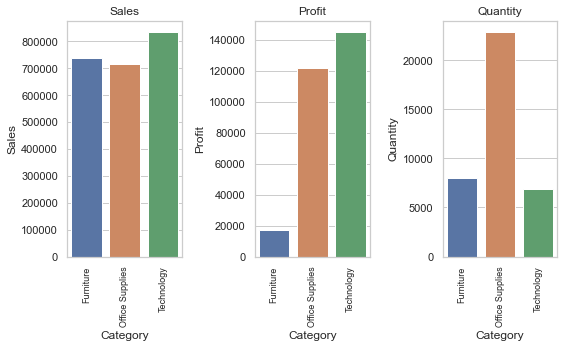

In [28]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = cat_analysis.index, y = cat_analysis.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

Our observations are:

* All 3 categories — Furniture, Office Supplies and Technology make similar amount of sales.

* Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.

* Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.

* Office Supplies sells the most in terms of quantity as it is relatively cheap product.

2. What are the Best Selling and Most Profitable Sub-Category?

In [30]:
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,328712.3040,44179.0956
Chairs,327733.9030,26411.3663
Storage,222279.3180,20872.1110
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167075.3080,41825.9844
Copiers,149528.0300,55617.8249
Bookcases,110475.0963,-4485.6830


Data frame of Sales and Profit by the Sub-Category in decescending orde

NameError: name 'subcat_Profit' is not defined

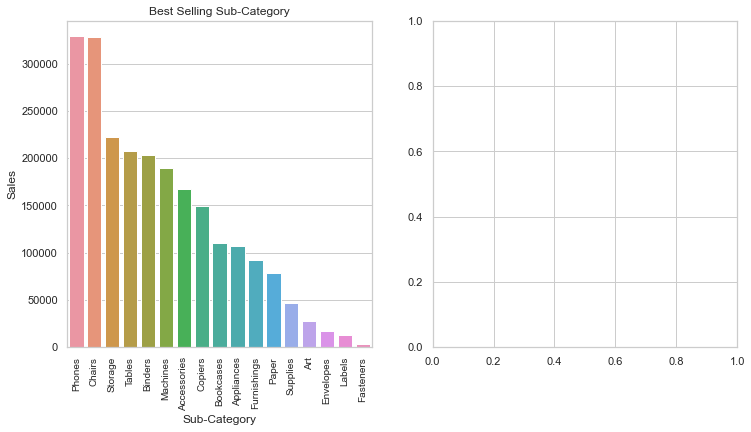

In [32]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_Profit, x = subcat_Profit.index, y = subcat_Profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

Bar plots showing the (L) Best Selling and (R) Most Profitable for Sub-Category

Let’s analyse the bar plots:

* Phones and Chairs are Top 2 best selling sub-category.

* Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.

* On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

3. Which is the Top Selling Sub-Category?

In [34]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5173
Furnishings,3563
Phones,3284
Storage,3145
Art,2994
Accessories,2967
Chairs,2353
Appliances,1726


Quantity sold for each Sub-Category

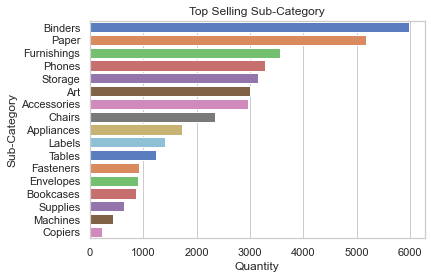

In [35]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

Bar plot showing Top Selling for each Sub-Category

Here, we can deduce that

* Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.

* Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

4. Which Customer Segment is Most Profitable?

In [36]:
seg_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
seg_analysis

,Profit
Segment,
Consumer,133744.0932
Corporate,90445.9067
Home Office,59962.0435


Total Profit by Customer Segment

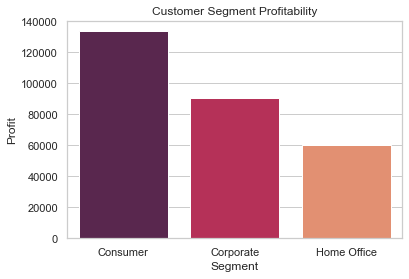

In [37]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = seg_analysis, x = seg_analysis.index, y = seg_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

Plot showing Total Profit for each customer Segment

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

5. Which is the Preferred Ship Mode?

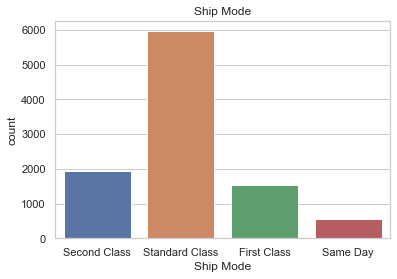

In [38]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(df['Ship Mode'])
plt.title("Ship Mode")
plt.show()

Plot showing no. of orders using different Ship Mode

By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

6. Which Region is the Most Profitable?

In [39]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,89277.8017
2,South,46749.4303
3,West,108418.4489


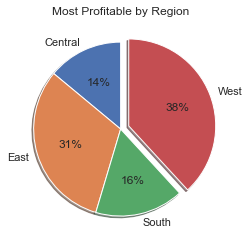

In [40]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

Pie chart showing percentage of sales by Region

East and West region are most profitable.

7. Which City has the Highest Number of Sales?

In [41]:
city_sales = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


Top 10 cities with highest sales

In [42]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


Bottom 10 cities with lowest sales

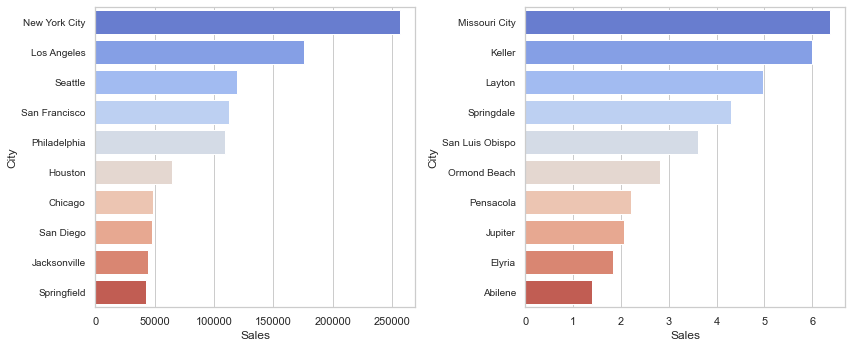

In [45]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])

top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])

bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

L: Top 10 cities with highest sales | R: Bottom 10 cities with lowest sales

There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

Strategic Recommendation

Here, we revisit our business questions and share with you our high-level business recommendations.

Business Questions

* Which Category is Best Selling and Most Profitable?

* What are the Best Selling and Most Profitable Sub-Category?

* Which is the Top Selling Sub-Category?

* Which Customer Segment is Most Profitable?

* Which is the Preferred Ship Mode?

* Which Region is the Most Profitable?

Recommendations

* Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

* Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

* For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

* Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.